In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
import timeit
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score,precision_score,recall_score,RocCurveDisplay
from matplotlib import pyplot

In [2]:
x_resampled=pd.read_csv('resampled_without_encoding.csv')
x_resampled_encoding=pd.read_csv('resampled_with_encoding.csv')
y_resampled=pd.read_csv('y_resampled.csv')

## Modelling

### Data with Resampling and without OneHotEncoding

In [3]:
X = x_resampled.values
Y = np.squeeze(y_resampled.values)
X_train,X_test1,y_train,y_test1=train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test1)

In [4]:
for n in range(3,6):
    model=MLPClassifier(hidden_layer_sizes=(n,),random_state=48)
    start_time = timeit.default_timer()
    model.fit(train_sc,y_train)
    elapsed = timeit.default_timer() - start_time
    y_pred1=model.predict(test_sc)
    print("Time taken to fit the model in sec is ",elapsed)
    print("Hidden Layer size ",n)
    print(f"Accuracy score:{accuracy_score(y_test1, y_pred1):.4f}")
    print(f"F1 score : {f1_score(y_test1, y_pred1):.4f}")
    print(f"Recall score : {recall_score(y_test1, y_pred1):.4f}")
    print(f"Precision score : {precision_score(y_test1, y_pred1):.4f}")
    print(f"Precision score : {confusion_matrix(y_test1,y_pred1)}")
    print(classification_report(y_test1, y_pred1))
    print()

Time taken to fit the model in sec is  36.67739280000001
Hidden Layer size  3
Accuracy score:0.9005
F1 score : 0.8975
Recall score : 0.8688
Precision score : 0.9281
Precision score : [[106644   7742]
 [ 15086  99936]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90    114386
           1       0.93      0.87      0.90    115022

    accuracy                           0.90    229408
   macro avg       0.90      0.90      0.90    229408
weighted avg       0.90      0.90      0.90    229408


Time taken to fit the model in sec is  29.288966800000026
Hidden Layer size  4
Accuracy score:0.8986
F1 score : 0.8951
Recall score : 0.8630
Precision score : 0.9297
Precision score : [[106880   7506]
 [ 15755  99267]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90    114386
           1       0.93      0.86      0.90    115022

    accuracy                           0.90    229408
   macro avg     

### Data with Resampling and with OneHotEncoding

In [6]:
X = x_resampled_encoding.values
Y = np.squeeze(y_resampled.values)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=10)

scaler = StandardScaler().fit(X_train)
train_sc = scaler.transform(X_train)
test_sc = scaler.transform(X_test)

model=MLPClassifier(random_state=48)
start_time = timeit.default_timer()
model.fit(train_sc,y_train)
elapsed = timeit.default_timer() - start_time
y_pred1=model.predict(test_sc)
print("Time taken to fit the model in sec is ",elapsed)

Time taken to fit the model in sec is  502.7337332000002


In [7]:
print(f"Accuracy score:{accuracy_score(y_test, y_pred1):.4f}")
print(f"F1 score : {f1_score(y_test, y_pred1):.4f}")
print(f"Recall score : {recall_score(y_test, y_pred1):.4f}")
print(f"Precision score : {precision_score(y_test, y_pred1):.4f}")

Accuracy score:0.9492
F1 score : 0.9485
Recall score : 0.9323
Precision score : 0.9652


In [12]:
model.coefs_

[array([[-0.83373115,  1.48606155, -0.27516723, ..., -0.43059017,
          0.39000241,  0.92606778],
        [ 0.40795694, -0.16576777,  1.19177271, ..., -0.44773126,
          0.86375272,  1.73416758],
        [-1.04797272,  1.18848347,  0.63377871, ..., -1.47238724,
         -1.32643249, -0.01155294],
        ...,
        [-0.68324564,  0.51505089, -1.25616464, ..., -0.09529753,
          1.51996268, -0.47470748],
        [ 2.27755126,  0.43083093,  1.3706895 , ...,  1.15605779,
          0.80451209, -1.00308006],
        [-1.24584999,  0.74582651,  0.7101979 , ..., -1.874874  ,
         -0.21993771, -0.49967329]]),
 array([[ 0.21887537],
        [-0.14398815],
        [-0.14701171],
        [ 0.18692246],
        [-0.13729299],
        [-0.15004384],
        [ 0.20278253],
        [ 0.13179549],
        [-0.1532489 ],
        [-0.1578522 ],
        [ 0.14161554],
        [-0.12395291],
        [-0.14107254],
        [ 0.1215273 ],
        [ 0.14648152],
        [ 0.17337293],
     

### Feature Selection

* Get Absolute Weights
* Group OneHotEncoing features
* Scale Weights

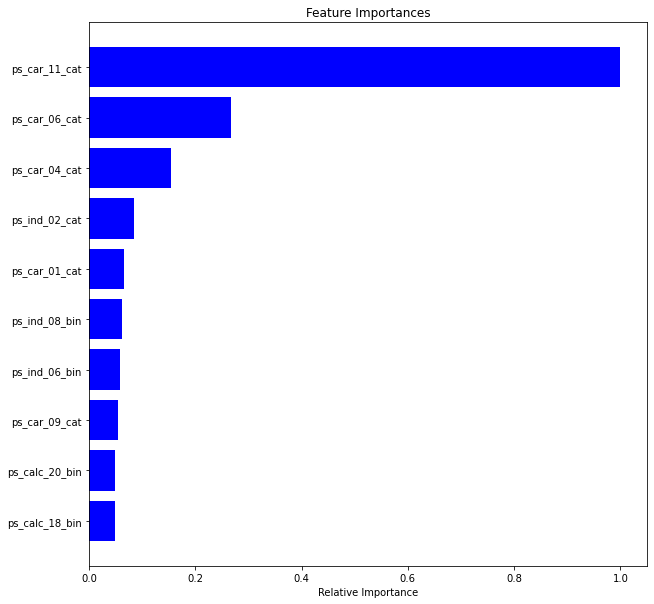

In [160]:
# Get Absolute Mean Weights
mean_coefs: list[float] = [np.abs(i.mean()) for i in model.coefs_[0]]
feat_imp = pd.DataFrame({"Col": x_resampled_encoding.columns})
feat_imp["Coef"] = mean_coefs

#Group OneHotEncoded features
feat_imp["Col"] = feat_imp["Col"].apply(lambda x: (x.split('cat')[0]+'cat') if 'cat' in x else x)
feat_imp = feat_imp.groupby("Col",as_index=False).sum().sort_values("Coef", ascending=False)
#Scale Weights
feat_imp["FeatImp"] = (
        (feat_imp["Coef"] - feat_imp["Coef"].min())
        / (feat_imp["Coef"].max() - feat_imp["Coef"].min())
    ).round(4)

# customized number 
num_features = 10 
pyplot.figure(figsize=(10,10))
pyplot.title('Feature Importances')
# only plot the customized number of features
pyplot.barh(range(num_features), feat_imp['FeatImp'][:num_features][::-1], color='b', align='center')
pyplot.yticks(range(num_features), feat_imp['Col'][:num_features][::-1])
pyplot.xlabel('Relative Importance')
pyplot.show()

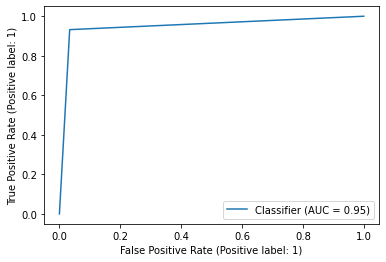

In [161]:
RocCurveDisplay.from_predictions(y_test, y_pred1)

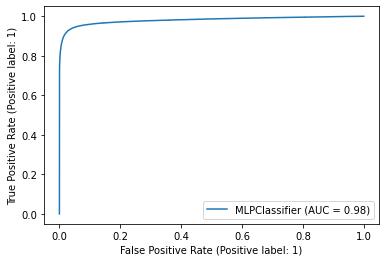

In [163]:
RocCurveDisplay.from_estimator(model,test_sc,y_test)

### OneHotEncoding improved accuracy